Hello and welcome to my project analyzing data on the most subscribed youtube channels. The dataset is from Kaggle. I will be using Python packages pandas, matplotlib, and seaborn to manipulate data and create visuals.

First, let's load the data specifying the data type for each column. This will make it easier to work with moving forward.

In [214]:
import pandas as pd
df=pd.read_csv('most_subscribed_youtube_channels.csv',
    dtype={'rank': 'int64',
        'Youtuber': 'str',
        'subscribers': 'int64',
        'video views':'int64',
        'video count':'int64',
        'category':'category',
        'started':'int64'},
        thousands=',')

print(df.head())
print(df.info())

   rank                    Youtuber  subscribers   video views  video count  \
0     1                    T-Series    222000000  198459090822        17317   
1     2              YouTube Movies    154000000             0            0   
2     3  Cocomelon - Nursery Rhymes    140000000  135481339848          786   
3     4                   SET India    139000000  125764252686        91271   
4     5                       Music    116000000             0            0   

           category  started  
0             Music     2006  
1  Film & Animation     2015  
2         Education     2006  
3             Shows     2006  
4               NaN     2013  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rank         1000 non-null   int64   
 1   Youtuber     1000 non-null   object  
 2   subscribers  1000 non-null   int64   
 3   video views  1

We can already see above that there are nulls and zero values where we should have non-zero values. Let's loop through the columns to count those up.

In [215]:
column_names=list(df.columns.values)

for item in column_names:
    print(item, 'nulls:', df[item].isna().sum())
    print(item, 'zeroes:', df[item].isin([0]).sum())

rank nulls: 0
rank zeroes: 0
Youtuber nulls: 0
Youtuber zeroes: 0
subscribers nulls: 0
subscribers zeroes: 0
video views nulls: 0
video views zeroes: 10
video count nulls: 0
video count zeroes: 10
category nulls: 27
category zeroes: 0
started nulls: 0
started zeroes: 0


I will create a dataframe that contains all of the items that have either a null in the category column, or a zero in the video views or video count columns.

In [216]:
dropping=(df['category'].isna()) | (df['video views'] == 0) | (df['video count'] == 0)
print(df[dropping])
print("There are", len(df[dropping]), "rows with insufficient data")

     rank                                           Youtuber  subscribers  \
1       2                                     YouTube Movies    154000000   
4       5                                              Music    116000000   
9      10                                             Gaming     92700000   
15     16                                             Sports     75100000   
81     82                                               News     36200000   
137   138                                 Popular on YouTube     29400000   
163   164                                     Vlad và Nikita     27100000   
180   181                                    व्लाद और निकिता     25900000   
202   203           Super JoJo - Nursery Rhymes & Kids Songs     24400000   
260   261                                 Diana and Roma ARA     21600000   
293   294                                         D Billions     20200000   
316   317                               Vlad and Niki Arabic     19600000   

29 rows of insufficient data accounts for only 2% of our total data, so we can drop these values to simplify things. 

In [217]:
df=df.drop(df[dropping].index)

for item in column_names:
    print(item, 'nulls:', df[item].isna().sum())
    print(item, 'zeroes:', df[item].isin([0]).sum())
    
print(df.shape)

rank nulls: 0
rank zeroes: 0
Youtuber nulls: 0
Youtuber zeroes: 0
subscribers nulls: 0
subscribers zeroes: 0
video views nulls: 0
video views zeroes: 0
video count nulls: 0
video count zeroes: 0
category nulls: 0
category zeroes: 0
started nulls: 0
started zeroes: 0
(971, 7)


Let's check if there are any duplicate values

In [218]:
print(df.duplicated(subset=['Youtuber']).any())
print(df[df['Youtuber'].duplicated()])

True
     rank            Youtuber  subscribers  video views  video count  \
578   579  Bollywood Classics     14500000   6036342725         1147   

          category  started  
578  Entertainment     2011  


We see that Bollywood classics has been duplicated, so let's drop row 578 and check again

In [219]:
df=df.drop(578)
print(df.duplicated(subset=['Youtuber']).any())

False


Now we can start some EDA. First, I will make a new dataframe that contains the numerical data. Let's check this out with the describe method.

In [220]:
numdata=df[['subscribers','video views', 'video count', 'started']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(numdata.describe())

        subscribers      video views  video count  started
count       970.000          970.000      970.000  970.000
mean   20243608.247   9329287051.828     8802.765 2012.272
std    14797643.851  12195168262.989    29775.395    3.974
min    10900000.000       439098.000        1.000 1970.000
25%    12700000.000   3638641720.000      347.750 2009.000
50%    15500000.000   6172359566.000      903.500 2013.000
75%    22000000.000  11530396866.250     3165.750 2015.000
max   222000000.000 198459090822.000   329711.000 2021.000


Hmmmm.. I see we have a channel that claims to have started in 1970, but Youtube was launched in 2005! Let's do some visualization to check out the outliers in the dataset.

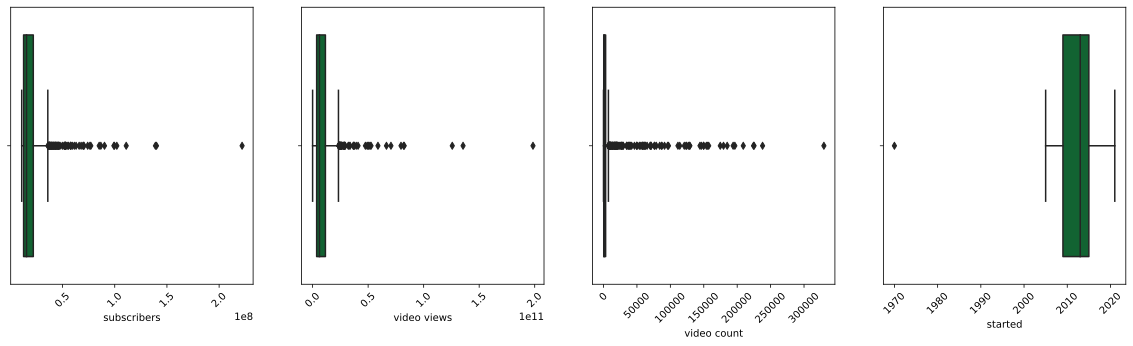

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

sns.set_palette('BuGn_r')

fig, axs = plt.subplots(1,4,figsize=(20, 5))

sns.boxplot(x=numdata['subscribers'],  data=numdata, ax=axs[0])
sns.boxplot(x=numdata['video views'],  data=numdata, ax=axs[1])
sns.boxplot(x=numdata['video count'],  data=numdata, ax=axs[2])
sns.boxplot(x=numdata['started'],  data=numdata, ax=axs[3])

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

plt.show()

From this visualization, we can see there there are a good deal of outliers. 
Since it is incorrect data, let's change that channel started in 1970 to 2005, the year Youtube launched.

In [222]:
df['started']=df['started'].replace(1970, 2005)
print(df.describe())

          rank   subscribers      video views  video count  started
count  970.000       970.000          970.000      970.000  970.000
mean   500.815  20243608.247   9329287051.828     8802.765 2012.308
std    287.217  14797643.851  12195168262.989    29775.395    3.741
min      1.000  10900000.000       439098.000        1.000 2005.000
25%    252.250  12700000.000   3638641720.000      347.750 2009.000
50%    500.500  15500000.000   6172359566.000      903.500 2013.000
75%    747.750  22000000.000  11530396866.250     3165.750 2015.000
max   1000.000 222000000.000 198459090822.000   329711.000 2021.000


Let's now calculate some averages for our numeric data

In [223]:
numdata=df[['subscribers','video views', 'video count', 'started']]
numdata=numdata.sort_values(['started'])
print(numdata.describe())

        subscribers      video views  video count  started
count       970.000          970.000      970.000  970.000
mean   20243608.247   9329287051.828     8802.765 2012.308
std    14797643.851  12195168262.989    29775.395    3.741
min    10900000.000       439098.000        1.000 2005.000
25%    12700000.000   3638641720.000      347.750 2009.000
50%    15500000.000   6172359566.000      903.500 2013.000
75%    22000000.000  11530396866.250     3165.750 2015.000
max   222000000.000 198459090822.000   329711.000 2021.000


Average subscriber count: 20,243,608
Average video views: 9,329,287,052
Average video count: 8803

Let's look at the data in a histogram to learn more.

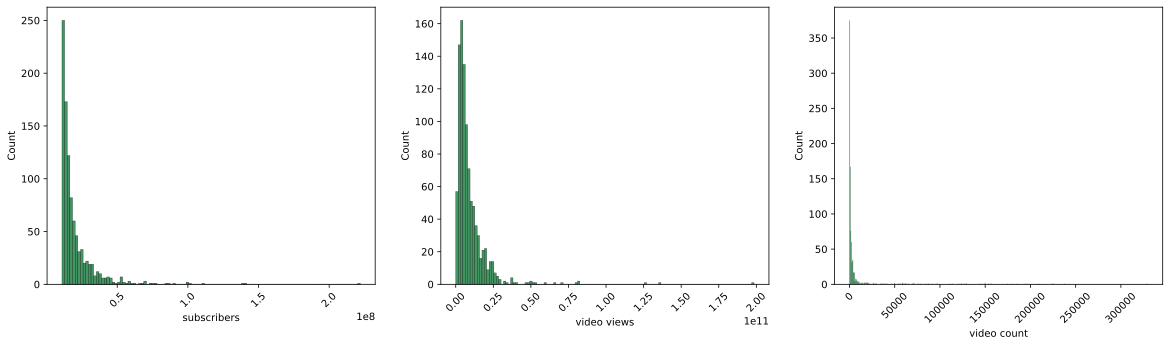

In [224]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))

sns.histplot(x=df['subscribers'],  data=numdata, ax=axs[0])
sns.histplot(x=df['video views'],  data=numdata, ax=axs[1])
sns.histplot(x=df['video count'],  data=numdata, ax=axs[2])

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

plt.show()

The histograms for subscribers, video views, and video count are all skewed right. It looks like the majority of these data points are smaller numbers. This tracks with our earlier boxplot and standard deviation data- the higher value data points are outliers. Because of this, we will consider the median as a more accurate measure of central tendency.

Median subscriber count: 15,500,000
Median video views: 6,172,359,566
Median video count: 903.5

Let's see what we can find out about the year channels were started

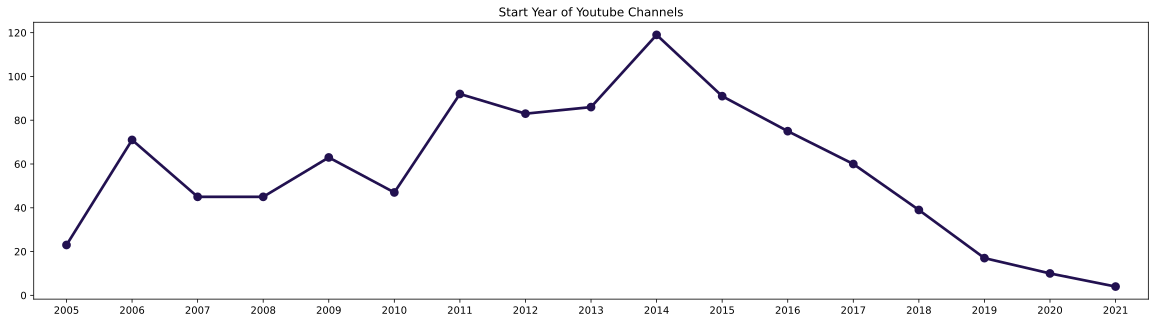

In [225]:
sns.set_palette('magma')

starteddf=numdata['started'].value_counts()
plt.figure(figsize=(20, 5))
sns.pointplot(x=starteddf.index, y=starteddf.values)
plt.title('Start Year of Youtube Channels')

plt.show()

So most channels here were started in 2014. After 2014, making a Youtube channel became less popular.

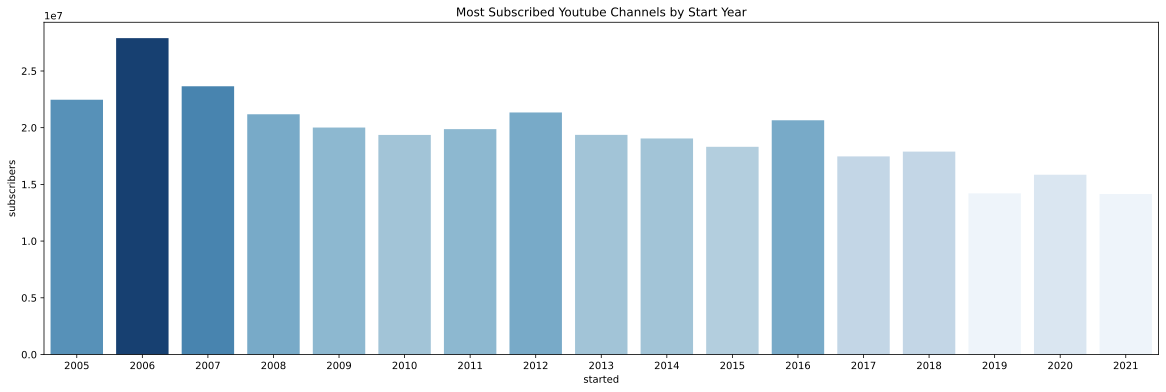

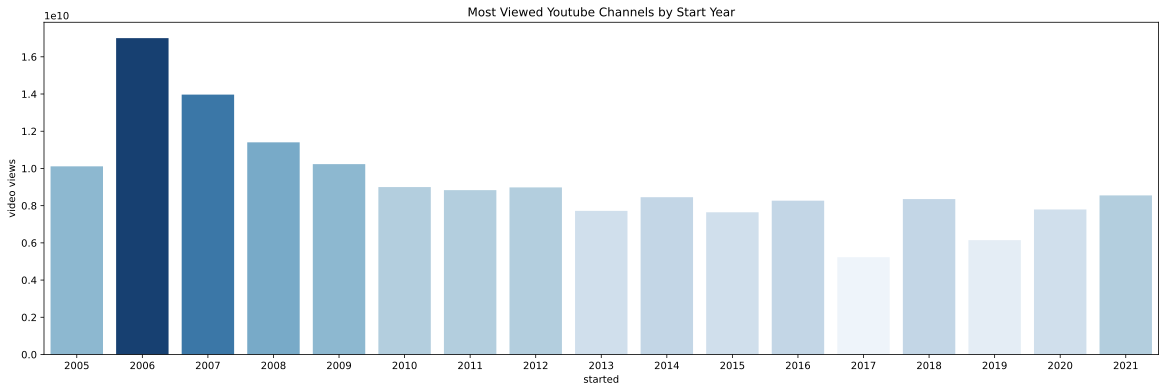

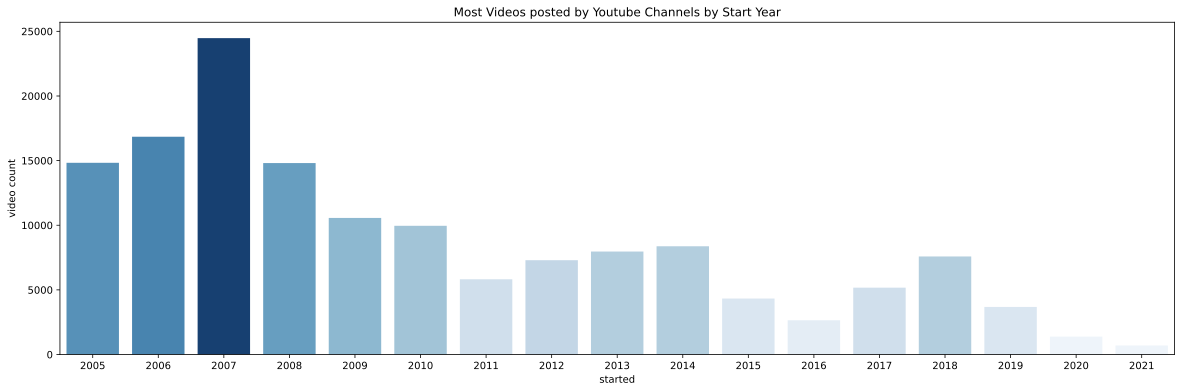

In [226]:
yeardf=numdata.groupby('started').mean().reset_index()
x=yeardf['started']

import numpy as np

def colors_from_values(values, palette_name):
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

plt.figure(figsize=(20, 6))
sns.barplot(x=x, y=yeardf['subscribers'], palette=colors_from_values(yeardf['subscribers'], "Blues"))
plt.title('Most Subscribed Youtube Channels by Start Year')

plt.figure(figsize=(20, 6))
sns.barplot(x=yeardf['started'], y=yeardf['video views'], palette=colors_from_values(yeardf['video views'], "Blues"))
plt.title('Most Viewed Youtube Channels by Start Year')

plt.figure(figsize=(20, 6))
sns.barplot(x=yeardf['started'], y=yeardf['video count'], palette=colors_from_values(yeardf['video count'], "Blues"))
plt.title('Most Videos posted by Youtube Channels by Start Year')
plt.show()

We can see from these bar graphs that the earlier you were to the game the more likely you are to have a popular channel, with 2006 and 2007 being the sweet spots.

Let's look at some of the top channels by video views, video count, and subscribers

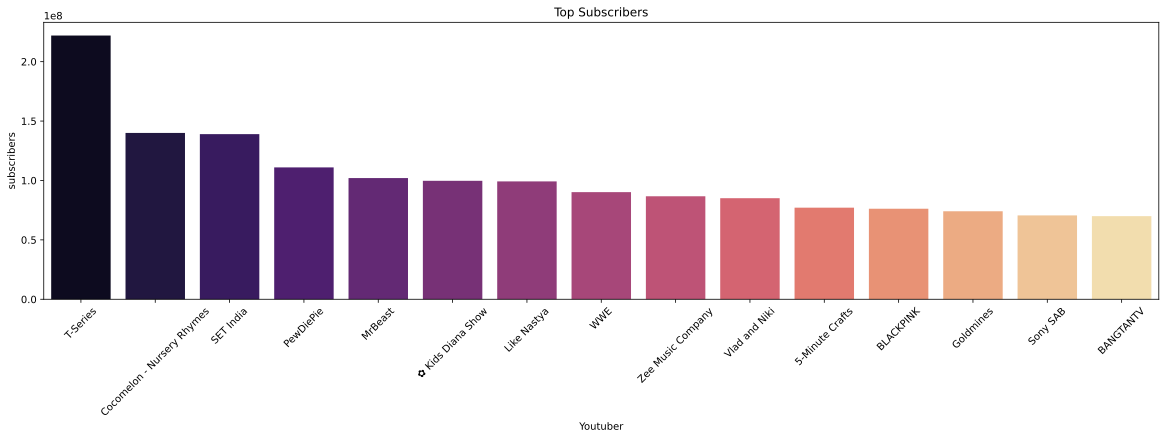

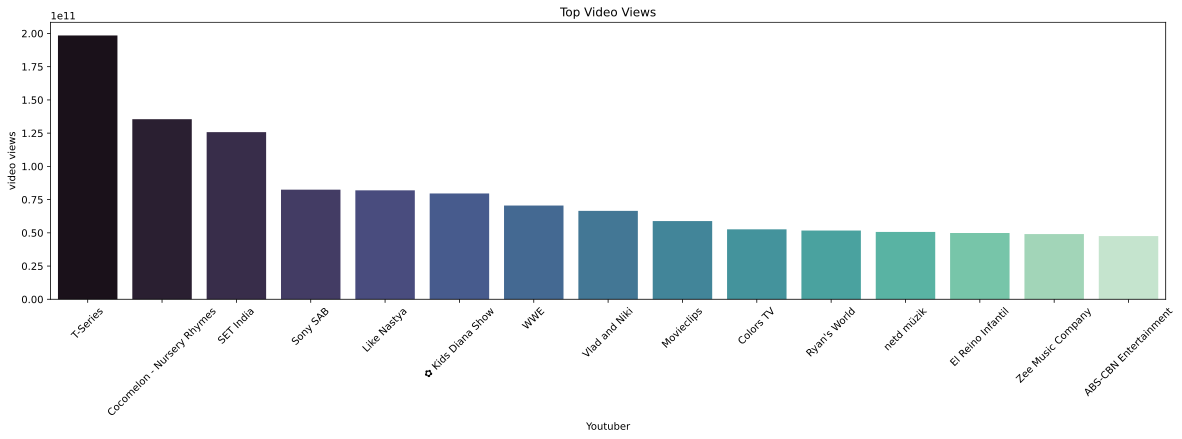

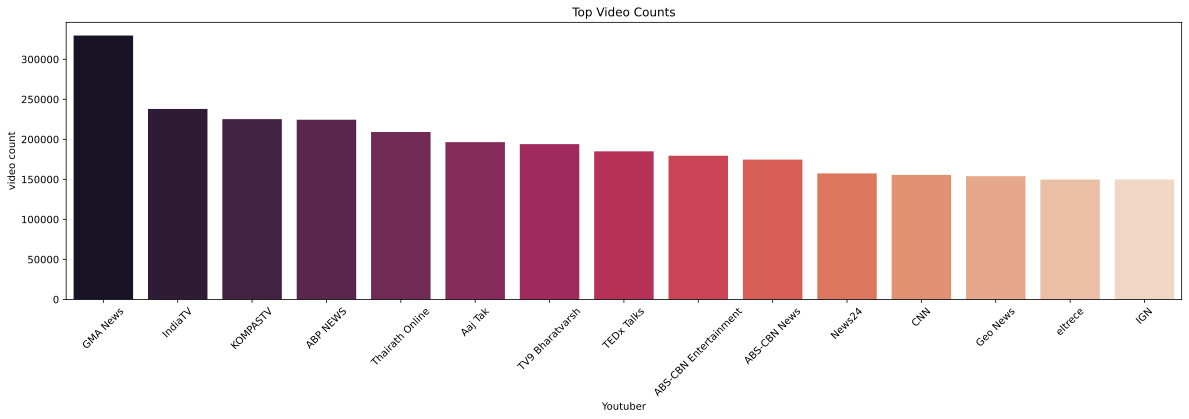

In [227]:
subscribersdf=df[:15]

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Top Subscribers')
sns.barplot(x='Youtuber', y='subscribers', data=subscribersdf, palette='magma')

vidviewsdf=df.sort_values(by='video views', ascending=False)
vidviewsdf=vidviewsdf[:15]

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Top Video Views')
sns.barplot(x='Youtuber', y='video views', data=vidviewsdf, palette='mako')

vidcountdf=df.sort_values(by='video count', ascending=False)
vidcountdf=vidcountdf[:15]

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.title('Top Video Counts')
sns.barplot(x='Youtuber', y='video count', data=vidcountdf, palette='rocket')

plt.show()

There is an interesting observation here- there is a good deal of overlap between the top subscribed and top viewed channels. Let's check out the pairwise relationship between these variables.

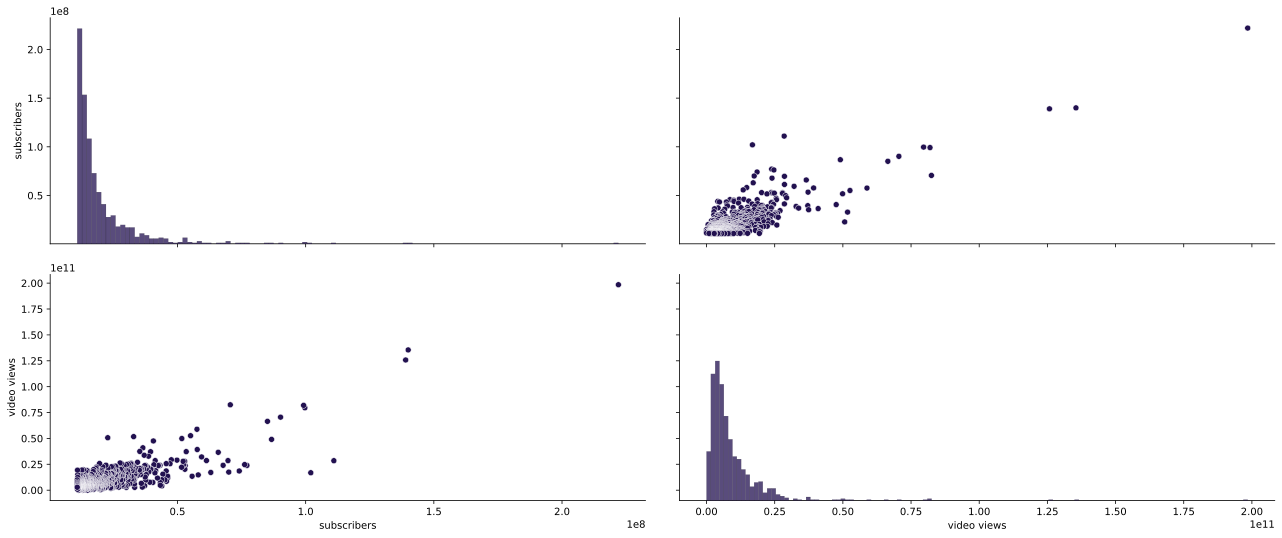

In [228]:
pairdf=df[['subscribers', 'video views']]
g=sns.pairplot(pairdf)
g.fig.set_size_inches(20,8)
plt.show()

It looks like there is a high correlation between subscribers and video views. We can further confirm this with a kernel density estimation. This will help us see how the data is generally distributed.

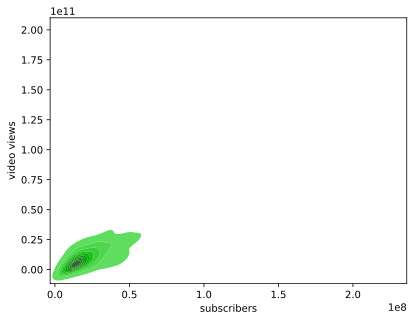

In [229]:
sns.kdeplot(data=pairdf, x=pairdf['subscribers'], y=pairdf['video views'],color='green',fill=True)
plt.show()

It looks like those channels who are in the top 10 subscribed graph but not in the top 10 viewed graph are outliers. The high subscriber counts of channels like Pewdiepie and MrBeast can be explained by trends such as the "subscribe to Pewdiepie" movement, which are anomalies.

We can further confirm this information with a heatmap that compares correlations between the variables.

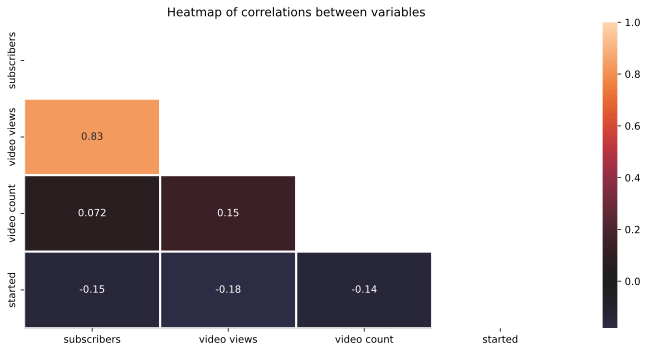

In [230]:
import numpy as np

plt.figure(figsize=(10,5))
corr = numdata.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=1, center=0,annot = True, linewidth=2)
plt.title('Heatmap of correlations between variables')
plt.tight_layout()
plt.show()

Now, let's group the data by category.

In [231]:
categorydf = df.groupby('category').size().sort_values(ascending=False).reset_index(name='count')
print(categorydf)

                 category  count
0           Entertainment    240
1                   Music    222
2          People & Blogs    119
3                  Gaming    102
4                  Comedy     63
5        Film & Animation     50
6               Education     46
7           Howto & Style     45
8         News & Politics     27
9    Science & Technology     18
10                  Shows     14
11                 Sports     10
12         Pets & Animals      6
13               Trailers      2
14                 Movies      2
15  Nonprofits & Activism      2
16       Autos & Vehicles      1
17        Travel & Events      1


Let's look at a visualization of the top 10 categories present in our data

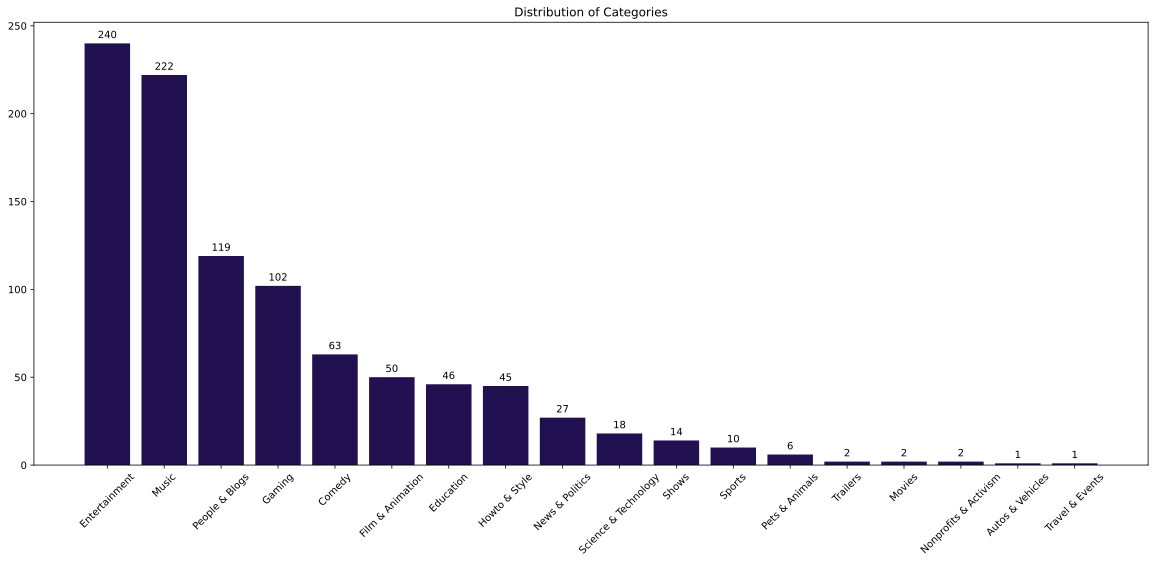

In [232]:
sns.set_palette('magma')

x=categorydf['category']
y=categorydf['count']

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+3, y[i], ha = 'center')

plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
plt.bar(x,y)
plt.title('Distribution of Categories')
addlabels(x,y)

plt.show()